In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 26.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
sugar=ctrl.Antecedent(np.arange(0,250,1),'sugar')
index=ctrl.Antecedent(np.arange(0,40.1,0.1),'index')
urination=ctrl.Antecedent(np.arange(0,11,1),'urination')
fatigue=ctrl.Antecedent(np.arange(0,11,1),'fatigue')
risk=ctrl.Consequent(np.arange(0,11,1),'risk')

In [ ]:
sugar['low']=fuzz.trimf(sugar.universe,[0,40,80])
sugar['normal']=fuzz.trimf(sugar.universe,[70,100,120])
sugar['high']=fuzz.trimf(sugar.universe,[110,160,200])
sugar['very high']=fuzz.trimf(sugar.universe,[170,200,240])

In [ ]:
index['underweight']=fuzz.trimf(index.universe,[0,10,18.5])
index['normal']=fuzz.trimf(index.universe,[17,20,24.9])
index['overweight']=fuzz.trimf(index.universe,[23,26,29.9])
index['obese']=fuzz.trimf(index.universe,[28,30,40])

In [ ]:
urination['rarely']=fuzz.trimf(urination.universe,[0,2,4])
urination['sometimes']=fuzz.trimf(urination.universe,[3,5,7])
urination['often']=fuzz.trimf(urination.universe,[6,8,10])


In [ ]:
fatigue['low']=fuzz.trimf(fatigue.universe,[0,2,4])
fatigue['moderate']=fuzz.trimf(fatigue.universe,[3,5,7])
fatigue['high']=fuzz.trimf(fatigue.universe,[6,8,10])


In [ ]:
risk['low']=fuzz.trimf(risk.universe,[0,2,4])
risk['medium']=fuzz.trimf(risk.universe,[3,4,6])
risk['high']=fuzz.trimf(risk.universe,[4,5,8])
risk['very high']=fuzz.trimf(risk.universe,[7,9,10])

In [ ]:
rule1=ctrl.Rule(sugar['very high']& urination['often'], risk['very high'])
rule2=ctrl.Rule(sugar['very high']& urination['sometimes'], risk['high'])
rule3=ctrl.Rule(sugar['high']& urination['often'], risk['high'])
rule4=ctrl.Rule(sugar['normal']& urination['rarely'], risk['low'])

rule5=ctrl.Rule(sugar['very high']& index['obese'], risk['very high'])
rule6=ctrl.Rule(sugar['very high']& index['overweight'], risk['high'])
rule7=ctrl.Rule(sugar['high']& index['overweight'], risk['high'])
rule8=ctrl.Rule(sugar['normal']& index['normal'], risk['low'])

rule9=ctrl.Rule(sugar['very high']& fatigue['high'], risk['very high'])
rule10=ctrl.Rule(sugar['high']& fatigue['high'], risk['high'])
rule11=ctrl.Rule(sugar['high']& fatigue['moderate'], risk['medium'])
rule12=ctrl.Rule(sugar['normal']& fatigue['low'], risk['low'])

risk 2.0


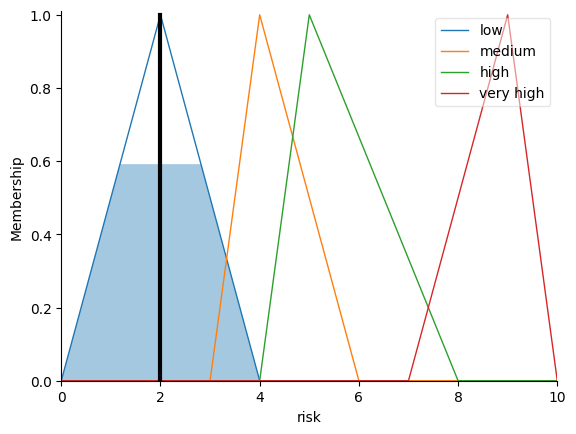

In [ ]:
control_system=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
system=ctrl.ControlSystemSimulation(control_system)
system.input['sugar']=100
system.input['index']=22
system.input['urination']=5
system.input['fatigue']=8
system.compute()
print('risk',system.output['risk'])
risk.view(sim=system)